In [25]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.metrics import mean_squared_error, r2_score
# for feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

# import classes for imputation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [4]:
# load dataset

data = pd.read_csv(r'C:\Users\427516\HandsOnPythonCode\data\houseprice\houseprice.csv')

In [5]:
# make lists of variable types

categorical = [var for var in data.columns if data[var].dtype == 'O']

year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 20 and var not in year_vars
]

numerical = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete and var not in ['Id', 'SalePrice']
    and var not in year_vars
]

print('There are {} continuous variables'.format(len(numerical)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} temporal variables'.format(len(year_vars)))
print('There are {} categorical variables'.format(len(categorical)))

There are 18 continuous variables
There are 14 discrete variables
There are 4 temporal variables
There are 43 categorical variables


In [101]:
cols_to_use = [
    'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [104]:
# let's load the House Prices dataset
numericdata = pd.read_csv(r'C:\Users\427516\HandsOnPythonCode\data\houseprice\houseprice.csv', usecols=numerical)
print(numericdata.shape)
numericdata.head()

(1460, 19)


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [105]:
# let's check the null values
numericdata.isnull().mean()

LotFrontage      0.177397
LotArea          0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
MiscVal          0.000000
SalePrice        0.000000
dtype: float64

In [106]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 3), (438, 3))

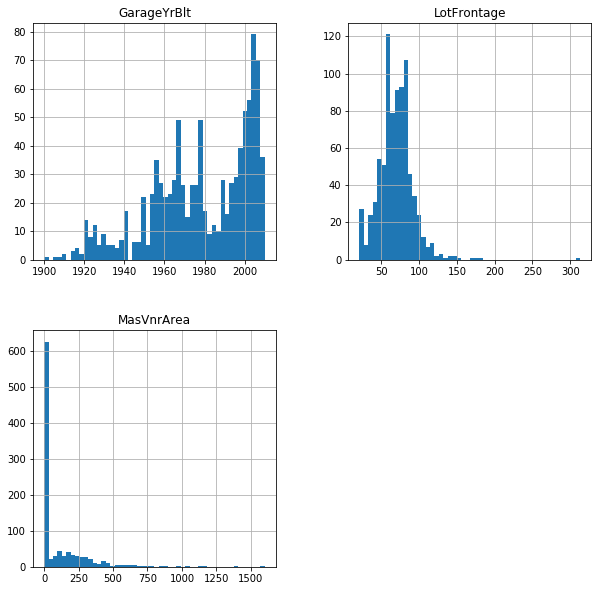

In [107]:
X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [108]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [109]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, cols_to_use)])

In [110]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Lasso(random_state=0))])

In [111]:
# now we create the grid with all the parameters that we would like to test

param_grid = {
    'preprocessor__numerical__imputer__strategy': ['mean', 'median']    
}

grid_search1 = GridSearchCV(clf, param_grid, cv=10, iid=False, scoring='r2')

In [112]:
# and now we train over all the possible combinations of the parameters above
grid_search1.fit(X_train, y_train)

# and we print the best score over the train set
print(("best linear regression from grid search: %.3f"
       % grid_search1.score(X_train, y_train)))

best linear regression from grid search: 0.425


In [113]:
# we can print the best estimator parameters like this
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                         

In [114]:
# and find the best fit parameters like this
grid_search.best_params_

{'preprocessor__numerical__imputer__strategy': 'mean'}